In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\mushrooms.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.shape

(8124, 23)

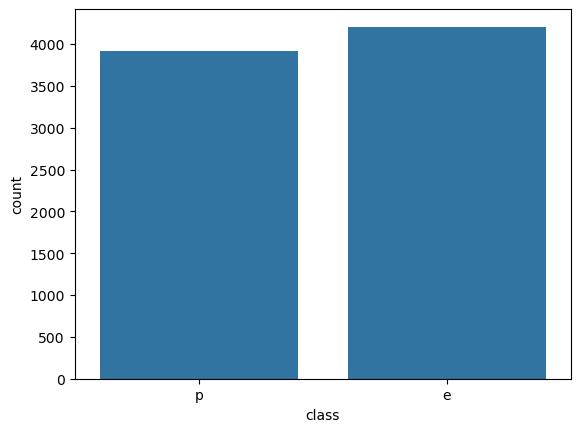

In [9]:
sns.countplot(data = df, x='class')
plt.show()

In [11]:
feat_uni = df.describe().T.reset_index().sort_values(by='unique')

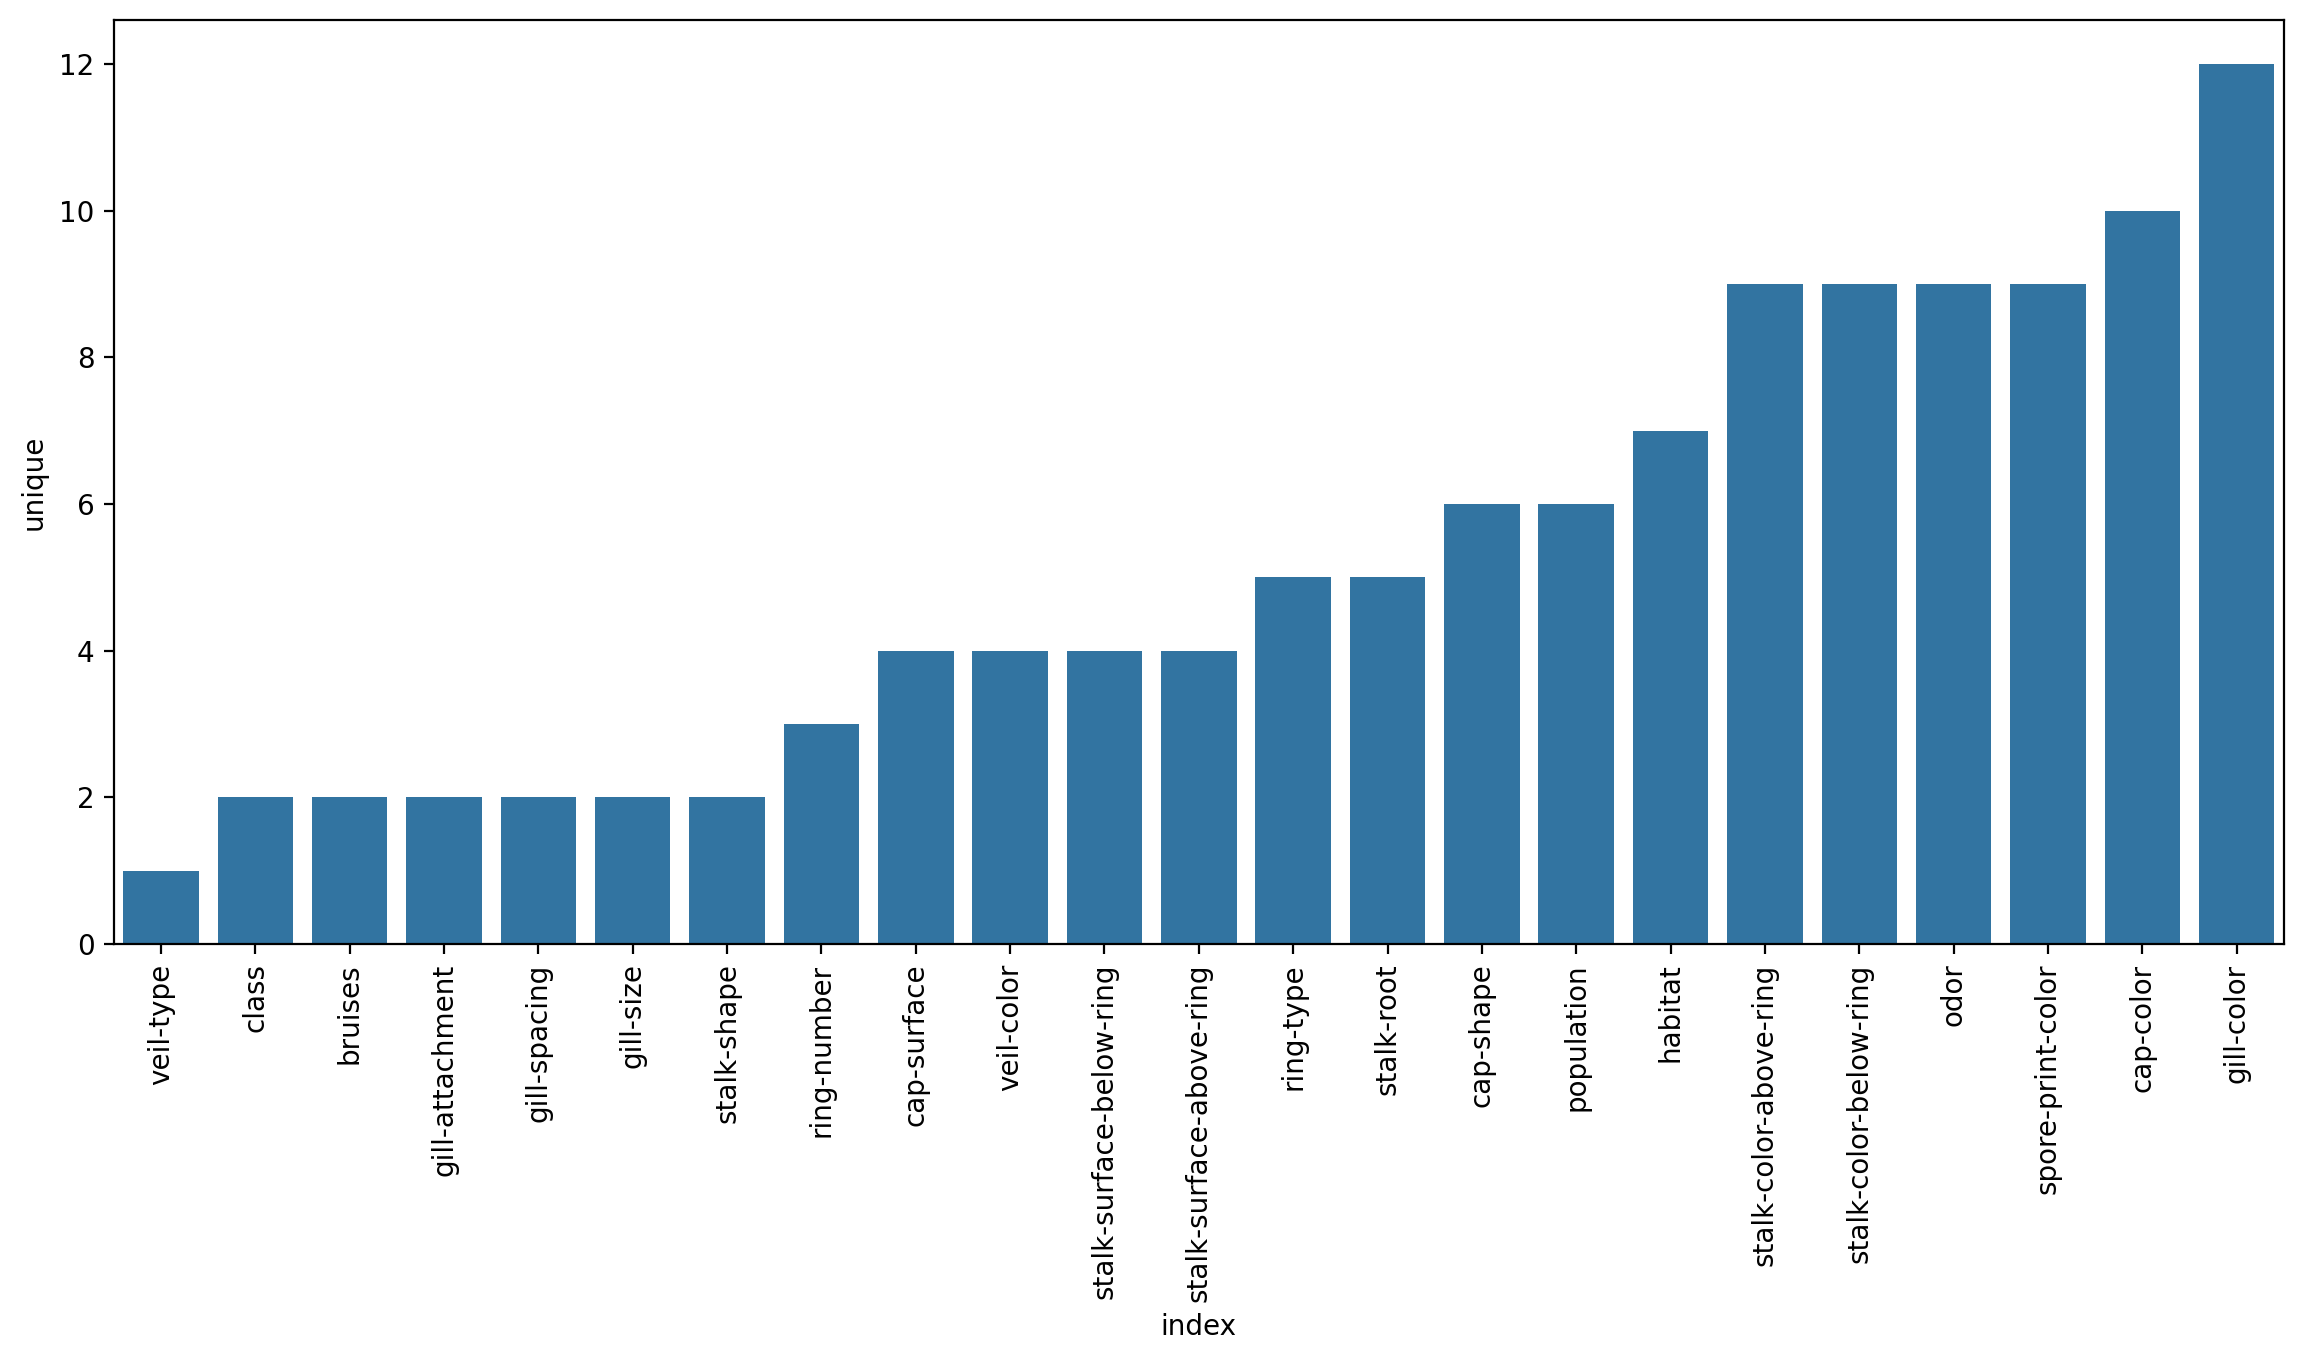

In [13]:
plt.figure(figsize=(14,6),dpi= 200)
sns.barplot(data = feat_uni,x = 'index',y = 'unique')
plt.xticks(rotation=90)
plt.show()

In [14]:
X = df.drop('class',axis=1)
y = df['class']

In [17]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [19]:
X = pd.get_dummies(X,drop_first=True,dtype = int)

In [21]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
X_train.shape

(6905, 95)

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
model = AdaBoostClassifier(n_estimators=1)

In [33]:
model.fit(X_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [35]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [37]:
preds = model.predict(X_test)

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [41]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
model.feature_importances_.argmax()

22

In [45]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

In [47]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


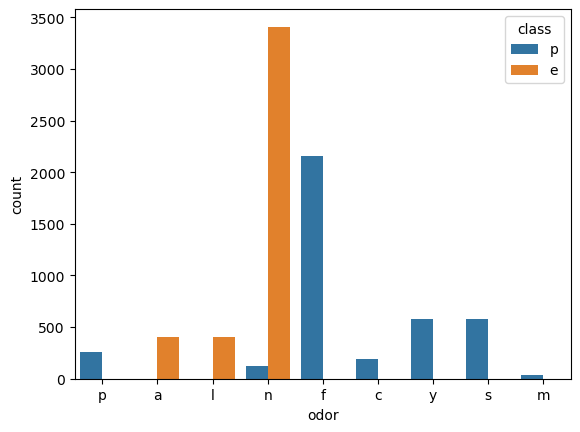

In [49]:
sns.countplot(x='odor',data = df,hue='class')
plt.show()

In [50]:
len(X.columns)

95

In [ ]:
error_rates = []
for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)
    

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\an

In [ ]:
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

error_rates = []

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for n in range(1, 96):
        model = AdaBoostClassifier(n_estimators=n)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        err = 1 - accuracy_score(y_test, preds)
        error_rates.append(err)


In [ ]:
plt.plot(range(1,96),error_rates)
plt.show()

In [ ]:
model

In [ ]:
features = pd.DataFrame(data=model.feature_importances_,index=X.columns,columns = ['Importance'])

In [ ]:
imp_feats = features[features['Importance']>0].sort_values(by='Importance',ascending=False)

In [100]:
imp_feats

,Importance
spore-print-color_w,0.168421
population_c,0.105263
gill-spacing_w,0.094737
gill-size_n,0.094737
odor_n,0.063158
stalk-surface-above-ring_k,0.063158
stalk-color-below-ring_n,0.063158
bruises_t,0.052632
spore-print-color_r,0.052632
population_v,0.042105


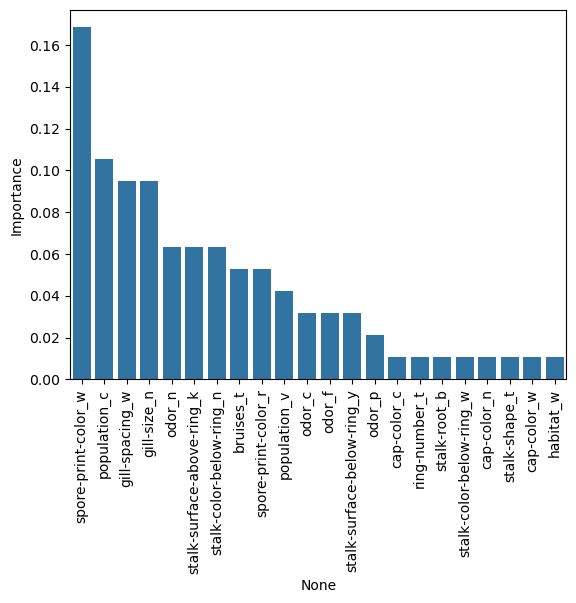

In [110]:
sns.barplot(data=imp_feats,x=imp_feats.index,y = 'Importance')
plt.xticks(rotation=90)
plt.show()

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True,dtype=int)
y = df['class']

In [10]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth': [3,4,5]}

In [22]:
gb_model = GradientBoostingClassifier()

In [24]:
grid = GridSearchCV(gb_model,param_grid)

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [30]:
predictions = grid.predict(X_test)

In [32]:
predictions

array(['e', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e',
       'e', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'e',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e

In [34]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4)

In [36]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [42]:
grid.best_estimator_.feature_importances_

array([ 4.92125545e-04,  4.43218526e-17,  0.00000000e+00,  0.00000000e+00,
       -6.40746676e-18,  2.26241059e-03,  3.43822879e-16,  1.30166024e-04,
        0.00000000e+00,  0.00000000e+00,  2.48448231e-18,  0.00000000e+00,
        3.46471169e-17,  0.00000000e+00,  0.00000000e+00,  1.28198317e-07,
        0.00000000e+00,  8.00638209e-02,  0.00000000e+00,  1.27408578e-02,
        3.27723321e-03,  3.23160527e-03,  6.16952896e-01,  2.43695821e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.78208572e-03,
        1.05748405e-03,  0.00000000e+00,  3.02024751e-16,  3.18595847e-17,
        0.00000000e+00,  1.45970987e-16,  0.00000000e+00,  3.27162328e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.64647200e-04,  9.90761669e-02,  2.01521610e-02,
        4.72605554e-02,  0.00000000e+00,  4.82578274e-17,  1.59712971e-09,
        0.00000000e+00,  2.12717256e-03,  1.48742125e-02,  3.00311521e-09,
        0.00000000e+00,  

In [44]:
feat_import = grid.best_estimator_.feature_importances_

In [46]:
imp_features  = pd.DataFrame(data = feat_import,index = X.columns,columns=['Importance'])

In [50]:
imp_features = imp_features[imp_features['Importance']>0.0005]

In [52]:
imp_features

,Importance
cap-surface_g,0.002262
bruises_t,0.080064
odor_f,0.012741
odor_l,0.003277
odor_m,0.003232
odor_n,0.616953
odor_p,0.024370
gill-spacing_w,0.003782
gill-size_n,0.001057
stalk-root_b,0.000865


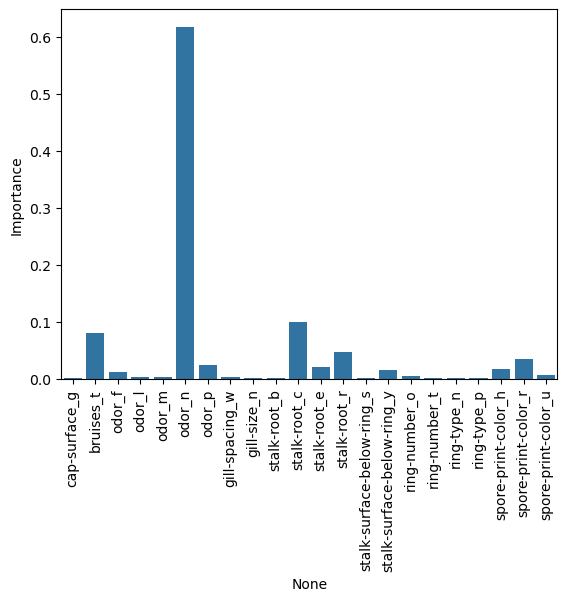

In [58]:
sns.barplot(data = imp_features,y='Importance', x = imp_features.index)
plt.xticks(rotation=90)
plt.show()